# Read and review time-series history files in parquet format

In [51]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta
import variables as vars
plt.rcParams["figure.figsize"] = (10,6)
import pytz
from datetime import datetime as dt, timedelta, timezone
%matplotlib inline

In [52]:
file_path_and_name = f'{vars.parquet_files_output_dir}{vars.internal_daily_parquet_file_name}.parquet'

In [53]:
daily_data = pd.read_parquet(file_path_and_name)
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34851 entries, 0 to 34850
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        34851 non-null  datetime64[ns]
 1   queueid     34851 non-null  object        
 2   aht         34851 non-null  float64       
 3   callvolume  34851 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.1+ MB


In [54]:
# check top rows of data
daily_data.head()

,date,queueid,aht,callvolume
0,2014-05-05,Org_3_0_15704,5.169886,1096.6070
1,2014-05-06,Org_3_0_15704,5.353064,1048.3280
2,2014-05-07,Org_3_0_15704,5.386593,1091.9828
3,2014-05-08,Org_3_0_15704,5.588364,1077.2236
4,2014-05-09,Org_3_0_15704,5.561843,1039.5412


# Key Stats about the data

### Number of rows, number of queues

In [55]:
num_rows = daily_data.shape[0]
print(f"number of rows in history: {num_rows}")

unique_queues = daily_data['queueid'].unique()

print(f"number of queues in history: {len(unique_queues)}")
print(f"list of queue ids: {unique_queues}")

number of rows in history: 34851
number of queues in history: 40
list of queue ids: ['Org_3_0_15704' 'Org_3_0_25200' 'Org_3_0_28392' 'Org_3_0_71176'
 'Org_3_0_77405' 'Org_3_0_8353' 'Org_3_0_85130' 'Org_3_0_93951'
 'Org_3_1_23067' 'Org_3_1_44929' 'Org_3_1_49024' 'Org_3_1_55795'
 'Org_3_1_71026' 'Org_3_1_8038' 'Org_3_1_83326' 'Org_3_1_85139'
 'Org_3_2_24138' 'Org_3_2_35830' 'Org_3_2_5751' 'Org_3_2_61675'
 'Org_3_2_69320' 'Org_3_2_82966' 'Org_3_2_89193' 'Org_3_2_90697'
 'Org_3_3_19062' 'Org_3_3_48561' 'Org_3_3_64368' 'Org_3_3_67342'
 'Org_3_3_72079' 'Org_3_3_73461' 'Org_3_3_73842' 'Org_3_3_85076'
 'Org_3_4_42214' 'Org_3_4_42721' 'Org_3_4_56002' 'Org_3_4_61770'
 'Org_3_4_78824' 'Org_3_4_85515' 'Org_3_4_89256' 'Org_3_4_89937']


### History start and end dates

In [56]:
history_start_date = daily_data['date'].min()
history_end_date = daily_data['date'].max()
print(f"history_start_date: {history_start_date}")
print(f"history_end_date: {history_end_date}")

history_start_date: 2014-05-03 00:00:00
history_end_date: 2017-05-01 00:00:00


 # Charting Volumes and AHT by date

### Chart of Volume and AHT per queue by Day
#### Side by Side charts

In [57]:
vol_col = 'callvolume'
aht_col = 'aht'

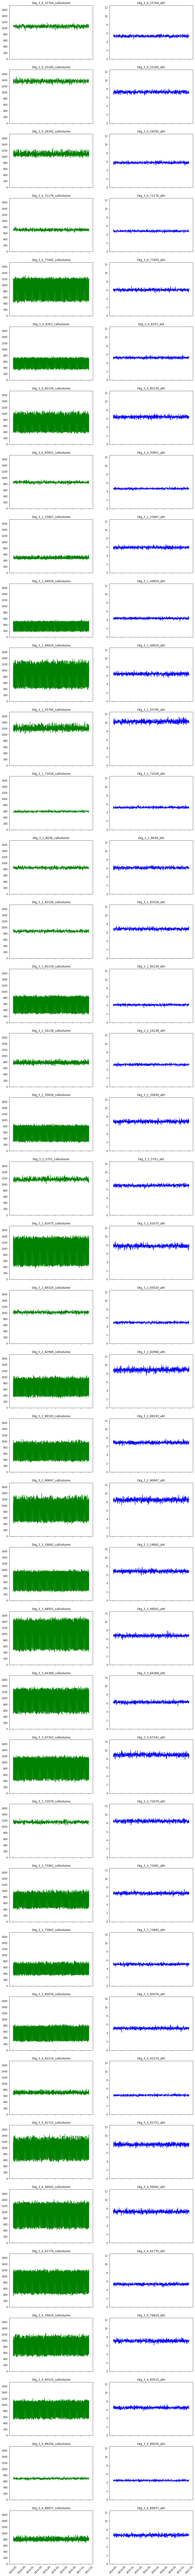

In [58]:
rows, cols = len(unique_queues), 2
fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize = (14, 5*rows), sharex=True, sharey=False)

y_max_vol = daily_data[vol_col].max()
y_max_aht = daily_data[aht_col].max()
for i, queue in enumerate(unique_queues):
    idx = daily_data['queueid'] == queue
    df = daily_data.loc[idx]    
    
    ax = axs[i, 0] if rows > 1 else axs[0]
    ax.plot(df['date'], df[vol_col], c = 'green')  
    ax.set_ylim([0, y_max_vol * 1.1])
    ax.set_title(queue+f'_{vol_col}')
    for tick in ax.get_xticklabels(): tick.set_rotation(45)
    
    ax = axs[i, 1] if rows > 1 else axs[1]
    ax.plot(df['date'], df[aht_col], c = 'blue')  
    ax.set_ylim([0, y_max_aht * 1.1])
    ax.set_title(queue+f'_{aht_col}')
    for tick in ax.get_xticklabels(): tick.set_rotation(45)

#plt.legend()

### Chart of Volumes by Day - All Queues Together

plt.rcParams["figure.figsize"] = (14,6)
y_max = daily_data[vol_col].max()
for i, queue in enumerate(unique_queues):
    idx = daily_data['queueid'] == queue
    df = daily_data.loc[idx]    
    plt.plot(df['date'], df[vol_col], label=queue)
    plt.ylim(bottom=0., top=y_max*1.1)
plt.legend()
plt.title("Daily Volumes")

### Chart of AHT by Day - All Queues Together

plt.rcParams["figure.figsize"] = (14,6)
y_max = daily_data[aht_col].max()
for i, queue in enumerate(unique_queues):
    idx = daily_data['queueid'] == queue
    df = daily_data.loc[idx]    
    plt.plot(df['date'], df[aht_col], label=queue)
    plt.ylim(bottom=0., top=y_max*1.1)
plt.legend()
plt.title("AHT by Day")

### Chart of Volumes by Day - Each Queue Separate

y_max = daily_data[vol_col].max()
if len(unique_queues) > 1:
    fig, axs = plt.subplots(len(unique_queues), figsize = (15, 5*len(unique_queues)), sharex=True, sharey=False)
else: 
    fig, axs = plt.subplots(figsize = (15, 5*len(unique_queues)),)

for i, queue in enumerate(unique_queues):
    idx = daily_data['queueid'] == queue
    df = daily_data.loc[idx]    
    
    ax = axs[i] if rows > 1 else axs                   
    ax.plot(df['date'], df[vol_col], c = 'green')  
    plt.ylim(bottom=0., top=y_max*1.1)
    ax.set_title(f'{queue}_vol')
    for tick in ax.get_xticklabels(): tick.set_rotation(45)

### Chart of AHT by Day - Each Queue Separate

y_max = daily_data[aht_col].max()
if len(unique_queues) > 1:
    fig, axs = plt.subplots(len(unique_queues), figsize = (15, 5*len(unique_queues)), sharex=True, sharey=False)
else: 
    fig, axs = plt.subplots(figsize = (15, 5*len(unique_queues)),)

for i, queue in enumerate(unique_queues):
    idx = daily_data['queueid'] == queue
    df = daily_data.loc[idx]    
    
    ax = axs[i] if rows > 1 else axs                   
    ax.plot(df['date'], df[aht_col], c = 'blue')  
    ax.set_title(f'{queue}_aht')
    plt.ylim(bottom=0., top=y_max*1.1)
    for tick in ax.get_xticklabels():        
        tick.set_rotation(45)